In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [108]:
RAW_DATA_PATH = "../../data/raw/"

In [109]:
submission_df = pd.read_csv(RAW_DATA_PATH + "submissions.csv")

In [110]:
submission_df.head()

,__v,_id,contestId,createdAt,duringContest,fileContent,language,memory,output,points,problemId,status,time,updatedAt,userId
0,0,5b608157e228ec0020a1fcf5,5b5c89ef30db8a0020962414,2018-07-31T10:03:43.362Z,True,https://firebasestorage.googleapis.com/v0/b/si...,C++14,3452KB,https://firebasestorage.googleapis.com/v0/b/si...,0,5b5c8cd7276e2200208fed62,Accepted,0s,2018-11-11T06:21:18.721Z,5b5d756037392f89933e7514
1,0,5b649806c0b1b80020eb30e0,5b5c89ef30db8a0020962414,2018-08-03T12:29:34.750Z,True,https://firebasestorage.googleapis.com/v0/b/si...,C,0KB,https://firebasestorage.googleapis.com/v0/b/si...,0,5b5c8cd7276e2200208fed62,Time Limit Exceeded,0s,2018-11-11T06:21:18.621Z,5b6490e95969e7002076f330
2,0,5b6499a9eae2320020c43e8a,5b5c89ef30db8a0020962414,2018-08-03T12:36:33.554Z,True,https://firebasestorage.googleapis.com/v0/b/si...,C,0KB,https://firebasestorage.googleapis.com/v0/b/si...,0,5b5c8cd7276e2200208fed62,Time Limit Exceeded,0s,2018-11-11T06:21:18.656Z,5b6490e95969e7002076f330
3,0,5b649eebeae2320020c43e8f,5b5c89ef30db8a0020962414,2018-08-03T12:58:59.425Z,True,https://firebasestorage.googleapis.com/v0/b/si...,C,9416KB,https://firebasestorage.googleapis.com/v0/b/si...,0,5b5c8cd7276e2200208fed62,Wrong Answer,0s,2018-11-11T06:21:19.140Z,5b6490e95969e7002076f330
4,0,5b64a0d8eae2320020c43e91,5b5c89ef30db8a0020962414,2018-08-03T13:07:12.145Z,True,https://firebasestorage.googleapis.com/v0/b/si...,C,9416KB,https://firebasestorage.googleapis.com/v0/b/si...,0,5b5c8cd7276e2200208fed62,Accepted,0s,2018-11-11T06:21:18.574Z,5b6490e95969e7002076f330


In [111]:
TO_REMOVE = ["__v","_id","contestId","createdAt","duringContest","fileContent","memory","output","points","time","updatedAt","userId"]

In [112]:
df = submission_df.drop(TO_REMOVE, axis=1)

In [113]:
len(df.problemId.unique())

204

In [114]:
df.head()

,language,problemId,status
0,C++14,5b5c8cd7276e2200208fed62,Accepted
1,C,5b5c8cd7276e2200208fed62,Time Limit Exceeded
2,C,5b5c8cd7276e2200208fed62,Time Limit Exceeded
3,C,5b5c8cd7276e2200208fed62,Wrong Answer
4,C,5b5c8cd7276e2200208fed62,Accepted


In [115]:
df.reset_index(drop=True, inplace=True)

In [116]:
df.head()

,language,problemId,status
0,C++14,5b5c8cd7276e2200208fed62,Accepted
1,C,5b5c8cd7276e2200208fed62,Time Limit Exceeded
2,C,5b5c8cd7276e2200208fed62,Time Limit Exceeded
3,C,5b5c8cd7276e2200208fed62,Wrong Answer
4,C,5b5c8cd7276e2200208fed62,Accepted


In [117]:
df.status.value_counts()

Wrong Answer           3608
Accepted               2928
Runtime Error          1322
Time Limit Exceeded     932
Compilation Error       446
Name: status, dtype: int64

In [118]:
TO_REPLACE = ["Wrong Answer","Runtime Error","Time Limit Exceeded","Compilation Error"]

In [119]:
REPLACE_WITH = "Not Accepted"

In [120]:
df.replace(TO_REPLACE,REPLACE_WITH,inplace=True)

In [121]:
df.head()

,language,problemId,status
0,C++14,5b5c8cd7276e2200208fed62,Accepted
1,C,5b5c8cd7276e2200208fed62,Not Accepted
2,C,5b5c8cd7276e2200208fed62,Not Accepted
3,C,5b5c8cd7276e2200208fed62,Not Accepted
4,C,5b5c8cd7276e2200208fed62,Accepted


In [122]:
df.status.value_counts()

Not Accepted    6308
Accepted        2928
Name: status, dtype: int64

In [123]:
df.language.value_counts()

Python3       4123
C++           2224
C             1467
Java          1037
C++14          313
Python          44
Go              17
Javascript      11
Name: language, dtype: int64

In [124]:
TO_REPLACE_LANGUAGE = ["C++14"]

In [125]:
REPLACE_WITH_LANGUAGE = "C++"

In [126]:
df.replace(TO_REPLACE_LANGUAGE,REPLACE_WITH_LANGUAGE,inplace=True)

In [127]:
df.head()

,language,problemId,status
0,C++,5b5c8cd7276e2200208fed62,Accepted
1,C,5b5c8cd7276e2200208fed62,Not Accepted
2,C,5b5c8cd7276e2200208fed62,Not Accepted
3,C,5b5c8cd7276e2200208fed62,Not Accepted
4,C,5b5c8cd7276e2200208fed62,Accepted


In [128]:
df.language.value_counts()

Python3       4123
C++           2537
C             1467
Java          1037
Python          44
Go              17
Javascript      11
Name: language, dtype: int64

In [129]:
df.problemId.value_counts()

63309651ab6261002246d342    288
5d615f02ec3cc6002207e857    232
5b5c8cd7276e2200208fed62    212
5b6c3ec18cab100020e963b7    152
63308489ab6261002246d32b    150
                           ... 
610e74874575780022cbbdba      3
5fae6cea77dd8c0022cb0432      2
6257c4a8fb139700243c5214      1
5f828e1a253e190022125d37      1
6336c0b1f9be3c00226020f2      1
Name: problemId, Length: 204, dtype: int64

In [130]:
df.shape

(9236, 3)

In [131]:
# group by problemId and status
group_prob_status = df.groupby(["problemId","status"]).count()

In [132]:
group_prob_status.head()

language
problemId                status                
5b5c8cd7276e2200208fed62 Accepted            79
                         Not Accepted       133
5b645f711b2cd40020b6c771 Accepted            41
                         Not Accepted        45
5b64600d1b2cd40020b6c772 Accepted            33

In [133]:
group_prob_status.shape

(392, 1)

In [134]:
group_prob_status.reset_index(inplace=True)

In [135]:
group_prob_status.head()

,problemId,status,language
0,5b5c8cd7276e2200208fed62,Accepted,79
1,5b5c8cd7276e2200208fed62,Not Accepted,133
2,5b645f711b2cd40020b6c771,Accepted,41
3,5b645f711b2cd40020b6c771,Not Accepted,45
4,5b64600d1b2cd40020b6c772,Accepted,33


In [136]:
group_prob_status.shape

(392, 3)

In [137]:
TO_REPLACE_STATUS = ["Accepted","Not Accepted"]
REPLACE_WITH_STATUS = [1,0]

In [138]:
group_prob_status.replace(TO_REPLACE_STATUS,REPLACE_WITH_STATUS,inplace=True)

<AxesSubplot:xlabel='language'>

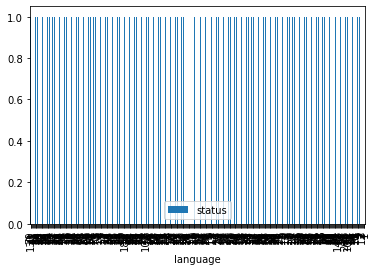

In [139]:
group_prob_status.plot(kind="bar",x="language",y="status")

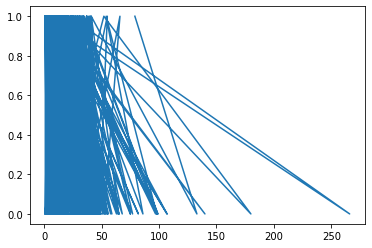

In [140]:
plt.plot(group_prob_status["language"],group_prob_status["status"])

<BarContainer object of 392 artists>

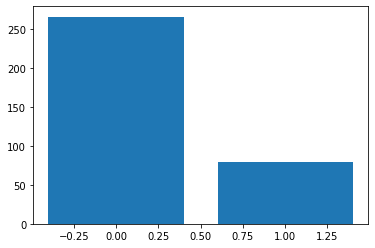

In [141]:
plt.bar(group_prob_status["status"],group_prob_status["language"])

<AxesSubplot:xlabel='status', ylabel='language'>

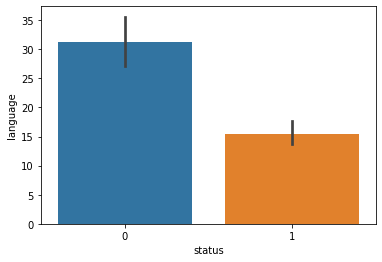

In [142]:
sns.barplot(x="status",y="language",data=group_prob_status)

In [143]:
group_prob_status.status.value_counts()

0    202
1    190
Name: status, dtype: int64

In [144]:
group_prob_status.head()

,problemId,status,language
0,5b5c8cd7276e2200208fed62,1,79
1,5b5c8cd7276e2200208fed62,0,133
2,5b645f711b2cd40020b6c771,1,41
3,5b645f711b2cd40020b6c771,0,45
4,5b64600d1b2cd40020b6c772,1,33


In [145]:
df.head()

,language,problemId,status
0,C++,5b5c8cd7276e2200208fed62,Accepted
1,C,5b5c8cd7276e2200208fed62,Not Accepted
2,C,5b5c8cd7276e2200208fed62,Not Accepted
3,C,5b5c8cd7276e2200208fed62,Not Accepted
4,C,5b5c8cd7276e2200208fed62,Accepted


In [146]:
group_language = df.groupby(["language","status","problemId"]).size().reset_index(name="count")

In [147]:
group_language.head(20)

,language,status,problemId,count
0,C,Accepted,5b5c8cd7276e2200208fed62,16
1,C,Accepted,5b645f711b2cd40020b6c771,5
2,C,Accepted,5b64600d1b2cd40020b6c772,3
3,C,Accepted,5b649819c0b1b80020eb30e1,5
4,C,Accepted,5b6c3ec18cab100020e963b7,14
5,C,Accepted,5b6c3fc08cab100020e963b8,8
6,C,Accepted,5b6c42d08cab100020e963b9,3
7,C,Accepted,5b714d3c155c0000206d76fc,3
8,C,Accepted,5b72e7f9750b6100209d9f12,10
9,C,Accepted,5b96a51f9808fa0020a42972,7


In [148]:
group_language.iloc[250:280]

,language,status,problemId,count
250,C++,Accepted,5e2d1287533c8d0022c770f3,3
251,C++,Accepted,5e2d281c533c8d0022c770fd,2
252,C++,Accepted,5e6cb4e245fd530022f5ad68,4
253,C++,Accepted,5e6dfacd502c4b0022178adb,2
254,C++,Accepted,5e8065b799770c00221d371a,3
255,C++,Accepted,5e8088ab99770c00221d371d,1
256,C++,Accepted,5e987904773965002294ebf1,4
257,C++,Accepted,5e988a5f773965002294ebf2,3
258,C++,Accepted,5e98a5f03af9550022fc130c,2
259,C++,Accepted,5e98b2ae3af9550022fc1311,4


In [149]:
group_language.shape

(1161, 4)

In [150]:
group_language.head(-100) 

,language,status,problemId,count
0,C,Accepted,5b5c8cd7276e2200208fed62,16
1,C,Accepted,5b645f711b2cd40020b6c771,5
2,C,Accepted,5b64600d1b2cd40020b6c772,3
3,C,Accepted,5b649819c0b1b80020eb30e1,5
4,C,Accepted,5b6c3ec18cab100020e963b7,14
...,...,...,...,...
1056,Python3,Not Accepted,5f6ae8654bf84b0022982b02,6
1057,Python3,Not Accepted,5f6c59f08cc9c4002205a871,5
1058,Python3,Not Accepted,5f6c60908cc9c4002205a872,11
1059,Python3,Not Accepted,5f81693ae5737600220575c1,8


In [151]:
group_language.language.value_counts()

Python3       366
C++           351
Java          217
C             185
Python         26
Go             10
Javascript      6
Name: language, dtype: int64

In [152]:
group_language[group_language.language == "Javascript"].head(16)

,language,status,problemId,count
763,Javascript,Accepted,5c39f4af80aaed0022b63275,1
764,Javascript,Accepted,5d3c780e7cb1120022007f29,1
765,Javascript,Not Accepted,5b6c3ec18cab100020e963b7,4
766,Javascript,Not Accepted,5b72e7f9750b6100209d9f12,3
767,Javascript,Not Accepted,5c39eca03646190022847c54,1
768,Javascript,Not Accepted,618bff9869467c00238c69b7,1


In [153]:
UNIQUE_PROBLEMS = df.problemId.unique()

In [154]:
len(UNIQUE_PROBLEMS)

204

In [155]:
group_prob_status.head()

,problemId,status,language
0,5b5c8cd7276e2200208fed62,1,79
1,5b5c8cd7276e2200208fed62,0,133
2,5b645f711b2cd40020b6c771,1,41
3,5b645f711b2cd40020b6c771,0,45
4,5b64600d1b2cd40020b6c772,1,33


In [156]:
group_language.head()

,language,status,problemId,count
0,C,Accepted,5b5c8cd7276e2200208fed62,16
1,C,Accepted,5b645f711b2cd40020b6c771,5
2,C,Accepted,5b64600d1b2cd40020b6c772,3
3,C,Accepted,5b649819c0b1b80020eb30e1,5
4,C,Accepted,5b6c3ec18cab100020e963b7,14


In [157]:
problem_group_language = dict()

In [158]:
for problem in UNIQUE_PROBLEMS:
    problem_group_language[problem] = {
        1 : group_prob_status[group_prob_status.problemId == problem].language.values[0] if (group_prob_status[group_prob_status.problemId == problem].status == 1).any() else 0,
        0 : group_prob_status[group_prob_status.problemId == problem].language.values[1] if len(group_prob_status[group_prob_status.problemId == problem].language.values) > 1 else group_prob_status[group_prob_status.problemId == problem].language.values[0] if (group_prob_status[group_prob_status.problemId == problem].status == 0).any() else 0
    }

In [159]:
problem_group_language["6301b5768296fc0022ebb48a"]

{1: 0, 0: 14}

In [160]:
print(problem_group_language)

{'5b5c8cd7276e2200208fed62': {1: 79, 0: 133}, '5b645f711b2cd40020b6c771': {1: 41, 0: 45}, '5b649819c0b1b80020eb30e1': {1: 21, 0: 86}, '5b64600d1b2cd40020b6c772': {1: 33, 0: 1}, '5b6c3ec18cab100020e963b7': {1: 54, 0: 98}, '5b6c3fc08cab100020e963b8': {1: 29, 0: 24}, '5b6c42d08cab100020e963b9': {1: 35, 0: 42}, '5b72e7f9750b6100209d9f12': {1: 34, 0: 99}, '5b714d3c155c0000206d76fc': {1: 19, 0: 17}, '5b72f1a5750b6100209d9f13': {1: 10, 0: 26}, '5b96a51f9808fa0020a42972': {1: 33, 0: 99}, '5b96a89fe701a900207872a6': {1: 4, 0: 33}, '5b96a9e0e701a900207872a7': {1: 3, 0: 15}, '5b9e5d0dc81946001f697c20': {1: 26, 0: 49}, '5b9e5acec81946001f697c1f': {1: 34, 0: 17}, '5b9e5804c81946001f697c1e': {1: 37, 0: 75}, '5b9e6068888c06001ffabf9b': {1: 14, 0: 65}, '5b9e444fc81946001f697c1d': {1: 2, 0: 14}, '5bae773afda1fc0021bbf24a': {1: 41, 0: 48}, '5bae7910fda1fc0021bbf24b': {1: 8, 0: 14}, '5bae7e94fda1fc0021bbf24c': {1: 1, 0: 17}, '5c2c5e61ec9f5000224eef13': {1: 22, 0: 30}, '5c2c5c6cec9f5000224eef12': {1: 5, 0

In [161]:
group_prob_status[group_prob_status.problemId == "6301b5768296fc0022ebb48a"]

,problemId,status,language
354,6301b5768296fc0022ebb48a,0,14


In [162]:
from operator import itemgetter
for key,value in problem_group_language.items():
    if value[0] + value[1] == 0:
        problem_group_language[key] = 0
    else:
        problem_group_language[key] = (value[1] / (value[0] + value[1]))

In [163]:
problem_group_language["5b5c8cd7276e2200208fed62"]

0.37264150943396224

In [164]:
group_prob_status[group_prob_status.problemId == "5b5c8cd7276e2200208fed62"]

,problemId,status,language
0,5b5c8cd7276e2200208fed62,1,79
1,5b5c8cd7276e2200208fed62,0,133


In [165]:
problem_group_language["6301b5768296fc0022ebb48a"]

0.0

In [166]:
problem_group_language

{'5b5c8cd7276e2200208fed62': 0.37264150943396224,
 '5b645f711b2cd40020b6c771': 0.47674418604651164,
 '5b649819c0b1b80020eb30e1': 0.19626168224299065,
 '5b64600d1b2cd40020b6c772': 0.9705882352941176,
 '5b6c3ec18cab100020e963b7': 0.35526315789473684,
 '5b6c3fc08cab100020e963b8': 0.5471698113207547,
 '5b6c42d08cab100020e963b9': 0.45454545454545453,
 '5b72e7f9750b6100209d9f12': 0.2556390977443609,
 '5b714d3c155c0000206d76fc': 0.5277777777777778,
 '5b72f1a5750b6100209d9f13': 0.2777777777777778,
 '5b96a51f9808fa0020a42972': 0.25,
 '5b96a89fe701a900207872a6': 0.10810810810810811,
 '5b96a9e0e701a900207872a7': 0.16666666666666666,
 '5b9e5d0dc81946001f697c20': 0.3466666666666667,
 '5b9e5acec81946001f697c1f': 0.6666666666666666,
 '5b9e5804c81946001f697c1e': 0.33035714285714285,
 '5b9e6068888c06001ffabf9b': 0.17721518987341772,
 '5b9e444fc81946001f697c1d': 0.125,
 '5bae773afda1fc0021bbf24a': 0.4606741573033708,
 '5bae7910fda1fc0021bbf24b': 0.36363636363636365,
 '5bae7e94fda1fc0021bbf24c': 0.055555

In [167]:
UNIQUE_PROBLEMS

array(['5b5c8cd7276e2200208fed62', '5b645f711b2cd40020b6c771',
       '5b649819c0b1b80020eb30e1', '5b64600d1b2cd40020b6c772',
       '5b6c3ec18cab100020e963b7', '5b6c3fc08cab100020e963b8',
       '5b6c42d08cab100020e963b9', '5b72e7f9750b6100209d9f12',
       '5b714d3c155c0000206d76fc', '5b72f1a5750b6100209d9f13',
       '5b96a51f9808fa0020a42972', '5b96a89fe701a900207872a6',
       '5b96a9e0e701a900207872a7', '5b9e5d0dc81946001f697c20',
       '5b9e5acec81946001f697c1f', '5b9e5804c81946001f697c1e',
       '5b9e6068888c06001ffabf9b', '5b9e444fc81946001f697c1d',
       '5bae773afda1fc0021bbf24a', '5bae7910fda1fc0021bbf24b',
       '5bae7e94fda1fc0021bbf24c', '5c2c5e61ec9f5000224eef13',
       '5c2c5c6cec9f5000224eef12', '5c2c5ac54ed5920022b4ae89',
       '5c2cd2eee3e5da002279017e', '5c2dadc092a9930022a9dc85',
       '5c2daf4992a9930022a9dc86', '5c39eca03646190022847c54',
       '5c4ae1bc91b74800225c106d', '5c4ae2fd91b74800225c106e',
       '5c39f0543646190022847c61', '5c39ed5736461900228

In [168]:
group_language

,language,status,problemId,count
0,C,Accepted,5b5c8cd7276e2200208fed62,16
1,C,Accepted,5b645f711b2cd40020b6c771,5
2,C,Accepted,5b64600d1b2cd40020b6c772,3
3,C,Accepted,5b649819c0b1b80020eb30e1,5
4,C,Accepted,5b6c3ec18cab100020e963b7,14
...,...,...,...,...
1156,Python3,Not Accepted,6330dde45766d0002293b565,12
1157,Python3,Not Accepted,6335f3dd125f8a00222e06eb,4
1158,Python3,Not Accepted,63361b9a125f8a00222e06ef,3
1159,Python3,Not Accepted,6336ad26ee62f10022c977c2,4


In [169]:
group_language.replace(TO_REPLACE_STATUS,REPLACE_WITH_STATUS,inplace=True)

In [170]:
problem_group_particular_language = dict()

In [171]:
group_language.language.value_counts()

Python3       366
C++           351
Java          217
C             185
Python         26
Go             10
Javascript      6
Name: language, dtype: int64

In [172]:
for problem in UNIQUE_PROBLEMS:
    problem_group_particular_language[problem] = {
        'Python3':{
        1 : group_language[(group_language.problemId == problem) & (group_language.language == "Python3") & group_language.status == 1]['count'].values[0] if (group_language[(group_language.problemId == problem) & (group_language.language == "Python3")]['status'] == 1).any() else 0,
        0 : group_language[(group_language.problemId == problem) & (group_language.language == "Python3") & (group_language.status == 0)]['count'].values[0] if (group_language[(group_language.problemId == problem) & (group_language.language == "Python3")]['status'] == 0).any() else 0,
        },
        'C++':{
        1 : group_language[(group_language.problemId == problem) & (group_language.language == "C++") & group_language.status == 1]['count'].values[0] if (group_language[(group_language.problemId == problem) & (group_language.language == "C++")]['status'] == 1).any() else 0,
        0 : group_language[(group_language.problemId == problem) & (group_language.language == "C++") & (group_language.status == 0)]['count'].values[0] if (group_language[(group_language.problemId == problem) & (group_language.language == "C++")]['status'] == 0).any() else 0,
        },
        'Java':{
        1 : group_language[(group_language.problemId == problem) & (group_language.language == "Java") & group_language.status == 1]['count'].values[0] if (group_language[(group_language.problemId == problem) & (group_language.language == "Java")]['status'] == 1).any() else 0,
        0 : group_language[(group_language.problemId == problem) & (group_language.language == "Java") & (group_language.status == 0)]['count'].values[0] if (group_language[(group_language.problemId == problem) & (group_language.language == "Java")]['status'] == 0).any() else 0,
        },
        'C':{
        1 : group_language[(group_language.problemId == problem) & (group_language.language == "C") & group_language.status == 1]['count'].values[0] if (group_language[(group_language.problemId == problem) & (group_language.language == "C")]['status'] == 1).any() else 0,
        0 : group_language[(group_language.problemId == problem) & (group_language.language == "C") & (group_language.status == 0)]['count'].values[0] if (group_language[(group_language.problemId == problem) & (group_language.language == "C")]['status'] == 0).any() else 0,
        },
        'Python':{
        1 : group_language[(group_language.problemId == problem) & (group_language.language == "Python") & group_language.status == 1]['count'].values[0] if (group_language[(group_language.problemId == problem) & (group_language.language == "Python")]['status'] == 1).any() else 0,
        0 : group_language[(group_language.problemId == problem) & (group_language.language == "Python") & (group_language.status == 0)]['count'].values[0] if (group_language[(group_language.problemId == problem) & (group_language.language == "Python")]['status'] == 0).any() else 0,
        }, 
        'Go':{
        1 : group_language[(group_language.problemId == problem) & (group_language.language == "Go") & group_language.status == 1]['count'].values[0] if (group_language[(group_language.problemId == problem) & (group_language.language == "Go")]['status'] == 1).any() else 0,
        0 : group_language[(group_language.problemId == problem) & (group_language.language == "Go") & (group_language.status == 0)]['count'].values[0] if (group_language[(group_language.problemId == problem) & (group_language.language == "Go")]['status'] == 0).any() else 0,
        }, 
        'Javascript':{
        1 : group_language[(group_language.problemId == problem) & (group_language.language == "Javascript") & group_language.status == 1]['count'].values[0] if (group_language[(group_language.problemId == problem) & (group_language.language == "Javascript")]['status'] == 1).any() else 0,
        0 : group_language[(group_language.problemId == problem) & (group_language.language == "Javascript") & (group_language.status == 0)]['count'].values[0] if (group_language[(group_language.problemId == problem) & (group_language.language == "Javascript")]['status'] == 0).any() else 0,
        }, 
    }
    # & (group_language.status == 1)

In [173]:
group_language[(group_language.problemId == "5b5c8cd7276e2200208fed62") & (group_language.language == "Python3") & (group_language.status == 0)]['count'].values[0]

23

In [174]:
group_language[group_language.problemId == "5b5c8cd7276e2200208fed62"]

,language,status,problemId,count
0,C,1,5b5c8cd7276e2200208fed62,16
75,C,0,5b5c8cd7276e2200208fed62,49
185,C++,1,5b5c8cd7276e2200208fed62,28
359,C++,0,5b5c8cd7276e2200208fed62,38
542,Go,0,5b5c8cd7276e2200208fed62,5
546,Java,1,5b5c8cd7276e2200208fed62,10
651,Java,0,5b5c8cd7276e2200208fed62,17
773,Python,0,5b5c8cd7276e2200208fed62,1
795,Python3,1,5b5c8cd7276e2200208fed62,25
969,Python3,0,5b5c8cd7276e2200208fed62,23


In [175]:
problem_group_particular_language["5b5c8cd7276e2200208fed62"]

{'Python3': {1: 25, 0: 23},
 'C++': {1: 28, 0: 38},
 'Java': {1: 10, 0: 17},
 'C': {1: 16, 0: 49},
 'Python': {1: 0, 0: 1},
 'Go': {1: 0, 0: 5},
 'Javascript': {1: 0, 0: 0}}

In [176]:
problem_group_particular_language

{'5b5c8cd7276e2200208fed62': {'Python3': {1: 25, 0: 23},
  'C++': {1: 28, 0: 38},
  'Java': {1: 10, 0: 17},
  'C': {1: 16, 0: 49},
  'Python': {1: 0, 0: 1},
  'Go': {1: 0, 0: 5},
  'Javascript': {1: 0, 0: 0}},
 '5b645f711b2cd40020b6c771': {'Python3': {1: 19, 0: 17},
  'C++': {1: 11, 0: 5},
  'Java': {1: 4, 0: 10},
  'C': {1: 5, 0: 13},
  'Python': {1: 2, 0: 0},
  'Go': {1: 0, 0: 0},
  'Javascript': {1: 0, 0: 0}},
 '5b649819c0b1b80020eb30e1': {'Python3': {1: 11, 0: 29},
  'C++': {1: 4, 0: 17},
  'Java': {1: 1, 0: 32},
  'C': {1: 5, 0: 7},
  'Python': {1: 0, 0: 1},
  'Go': {1: 0, 0: 0},
  'Javascript': {1: 0, 0: 0}},
 '5b64600d1b2cd40020b6c772': {'Python3': {1: 17, 0: 0},
  'C++': {1: 9, 0: 0},
  'Java': {1: 4, 0: 1},
  'C': {1: 3, 0: 0},
  'Python': {1: 0, 0: 0},
  'Go': {1: 0, 0: 0},
  'Javascript': {1: 0, 0: 0}},
 '5b6c3ec18cab100020e963b7': {'Python3': {1: 14, 0: 10},
  'C++': {1: 17, 0: 20},
  'Java': {1: 9, 0: 14},
  'C': {1: 14, 0: 48},
  'Python': {1: 0, 0: 2},
  'Go': {1: 0, 0: 

In [177]:
group_language[group_language.problemId == '5b5c8cd7276e2200208fed62']

,language,status,problemId,count
0,C,1,5b5c8cd7276e2200208fed62,16
75,C,0,5b5c8cd7276e2200208fed62,49
185,C++,1,5b5c8cd7276e2200208fed62,28
359,C++,0,5b5c8cd7276e2200208fed62,38
542,Go,0,5b5c8cd7276e2200208fed62,5
546,Java,1,5b5c8cd7276e2200208fed62,10
651,Java,0,5b5c8cd7276e2200208fed62,17
773,Python,0,5b5c8cd7276e2200208fed62,1
795,Python3,1,5b5c8cd7276e2200208fed62,25
969,Python3,0,5b5c8cd7276e2200208fed62,23


In [178]:
group_language[(group_language.problemId == '5b5c8cd7276e2200208fed62') & (group_language.language == "Python3") & (group_language.status == 1)]

,language,status,problemId,count
795,Python3,1,5b5c8cd7276e2200208fed62,25


In [179]:
for key,value in problem_group_particular_language.items():
    for key1,value1 in value.items():
        if(value1[0] + value1[1] != 0):
            problem_group_particular_language[key][key1] = value1[1]/(value1[0] + value1[1])
        else:
            problem_group_particular_language[key][key1] = 0

In [180]:
group_language[group_language.problemId == '5b5c8cd7276e2200208fed62']

,language,status,problemId,count
0,C,1,5b5c8cd7276e2200208fed62,16
75,C,0,5b5c8cd7276e2200208fed62,49
185,C++,1,5b5c8cd7276e2200208fed62,28
359,C++,0,5b5c8cd7276e2200208fed62,38
542,Go,0,5b5c8cd7276e2200208fed62,5
546,Java,1,5b5c8cd7276e2200208fed62,10
651,Java,0,5b5c8cd7276e2200208fed62,17
773,Python,0,5b5c8cd7276e2200208fed62,1
795,Python3,1,5b5c8cd7276e2200208fed62,25
969,Python3,0,5b5c8cd7276e2200208fed62,23


In [181]:
problem_group_particular_language["5b5c8cd7276e2200208fed62"]

{'Python3': 0.5208333333333334,
 'C++': 0.42424242424242425,
 'Java': 0.37037037037037035,
 'C': 0.24615384615384617,
 'Python': 0.0,
 'Go': 0.0,
 'Javascript': 0}

In [182]:
# problem_group_particular_language
problem_group_language["5b5c8cd7276e2200208fed62"]

0.37264150943396224

In [183]:
success_score = dict()

In [184]:
for problems in UNIQUE_PROBLEMS:
    temp = []
    languages = []
    for language in group_language.language.unique():
        languages.append(language)
        temp.append(1 / (1 + (problem_group_language[problems] - problem_group_particular_language[problems][language])))
    success_score[problems] = dict(zip(languages,temp))

In [185]:
success_score["6336c0b1f9be3c00226020f2"]

{'C': 1.0,
 'C++': 1.0,
 'Go': 1.0,
 'Java': 1.0,
 'Javascript': 1.0,
 'Python': 1.0,
 'Python3': 1.0}

In [186]:
group_language[group_language.problemId == '6336c0b1f9be3c00226020f2']

,language,status,problemId,count
1160,Python3,0,6336c0b1f9be3c00226020f2,1


In [187]:
group_prob_status[group_prob_status.problemId == '5b5c8cd7276e2200208fed62']

,problemId,status,language
0,5b5c8cd7276e2200208fed62,1,79
1,5b5c8cd7276e2200208fed62,0,133


In [188]:
x = pd.DataFrame.from_dict(success_score, orient='index')
x.columns.name = 'problemId'
x

problemId,C,C++,Go,Java,Javascript,Python,Python3
5b5c8cd7276e2200208fed62,0.887715,1.054408,0.728522,0.997734,0.728522,0.728522,1.173973
5b645f711b2cd40020b6c771,0.834052,1.267035,0.677165,0.839609,0.677165,2.097561,1.053778
5b649819c0b1b80020eb30e1,1.282717,0.994248,0.835938,0.857663,0.835938,0.835938,1.085468
5b64600d1b2cd40020b6c772,1.030303,1.030303,0.507463,0.854271,0.507463,0.507463,1.030303
5b6c3ec18cab100020e963b7,0.885381,1.116316,0.737864,1.037389,0.737864,0.737864,1.295455
...,...,...,...,...,...,...,...
63361b9a125f8a00222e06ef,0.666667,1.333333,0.666667,2.000000,0.666667,0.666667,0.666667
633620e3fe6e62002205e71e,0.705882,1.039370,0.705882,0.705882,0.705882,0.705882,0.705882
6336ad26ee62f10022c977c2,0.875000,1.086207,0.875000,0.875000,0.875000,0.875000,0.875000
6336b760ee62f10022c97c37,0.769231,1.147541,0.769231,0.769231,0.769231,0.769231,0.769231


In [189]:
# x.to_csv("../../data/processed/success_score.csv")
# x

In [190]:
submission_df[submission_df.problemId == '6336ad26ee62f10022c977c2']

,__v,_id,contestId,createdAt,duringContest,fileContent,language,memory,output,points,problemId,status,time,updatedAt,userId
9198,0,6336b2ddee62f10022c97a19,63359cf3125f8a00222e0641,2022-09-30T09:11:59.412Z,True,https://firebasestorage.googleapis.com/v0/b/si...,C++,904 KB,https://firebasestorage.googleapis.com/v0/b/si...,-30,6336ad26ee62f10022c977c2,Wrong Answer,0.007s,2022-09-30T09:11:59.412Z,63309b7eab6261002246d346
9202,0,6336b4c3ee62f10022c97b2e,63359cf3125f8a00222e0641,2022-09-30T09:20:04.847Z,True,https://firebasestorage.googleapis.com/v0/b/si...,Java,15288 KB,https://firebasestorage.googleapis.com/v0/b/si...,-30,6336ad26ee62f10022c977c2,Runtime Error,0.154s,2022-09-30T09:20:04.847Z,62dd511d11953400223da4c0
9204,0,6336b631ee62f10022c97b9e,63359cf3125f8a00222e0641,2022-09-30T09:26:10.936Z,True,https://firebasestorage.googleapis.com/v0/b/si...,C++,936 KB,https://firebasestorage.googleapis.com/v0/b/si...,-30,6336ad26ee62f10022c977c2,Wrong Answer,0.004s,2022-09-30T09:26:10.936Z,632497767b05210022176760
9205,0,6336b679ee62f10022c97ba9,63359cf3125f8a00222e0641,2022-09-30T09:27:22.644Z,True,https://firebasestorage.googleapis.com/v0/b/si...,C++,952 KB,https://firebasestorage.googleapis.com/v0/b/si...,-30,6336ad26ee62f10022c977c2,Wrong Answer,0.004s,2022-09-30T09:27:22.644Z,63309aaeab6261002246d345
9206,0,6336b67bee62f10022c97baf,63359cf3125f8a00222e0641,2022-09-30T09:27:24.953Z,True,https://firebasestorage.googleapis.com/v0/b/si...,C++,932 KB,https://firebasestorage.googleapis.com/v0/b/si...,-30,6336ad26ee62f10022c977c2,Wrong Answer,0.007s,2022-09-30T09:27:24.953Z,632497767b05210022176760
9207,0,6336b745ee62f10022c97c1d,63359cf3125f8a00222e0641,2022-09-30T09:30:47.176Z,True,https://firebasestorage.googleapis.com/v0/b/si...,C++,956 KB,https://firebasestorage.googleapis.com/v0/b/si...,300,6336ad26ee62f10022c977c2,Accepted,0.007s,2022-09-30T09:30:47.176Z,63309aaeab6261002246d345
9208,0,6336b804ee62f10022c97cb9,63359cf3125f8a00222e0641,2022-09-30T09:33:57.927Z,True,https://firebasestorage.googleapis.com/v0/b/si...,Python3,3268 KB,https://firebasestorage.googleapis.com/v0/b/si...,-30,6336ad26ee62f10022c977c2,Wrong Answer,0.028s,2022-09-30T09:33:57.927Z,632f4d7bb5de7e00221ee299
9209,0,6336b9dfee62f10022c97d91,63359cf3125f8a00222e0641,2022-09-30T09:41:53.238Z,True,https://firebasestorage.googleapis.com/v0/b/si...,C++,940 KB,https://firebasestorage.googleapis.com/v0/b/si...,300,6336ad26ee62f10022c977c2,Accepted,0.007s,2022-09-30T09:41:53.238Z,632497767b05210022176760
9212,0,6336bc01f9be3c002260205b,63359cf3125f8a00222e0641,2022-09-30T09:50:59.282Z,True,https://firebasestorage.googleapis.com/v0/b/si...,Python3,3252 KB,https://firebasestorage.googleapis.com/v0/b/si...,-30,6336ad26ee62f10022c977c2,Wrong Answer,0.021s,2022-09-30T09:50:59.282Z,632f4d7bb5de7e00221ee299
9215,0,6336bed5f9be3c00226020db,63359cf3125f8a00222e0641,2022-09-30T10:03:03.239Z,True,https://firebasestorage.googleapis.com/v0/b/si...,Python3,3224 KB,https://firebasestorage.googleapis.com/v0/b/si...,-30,6336ad26ee62f10022c977c2,Wrong Answer,0.026s,2022-09-30T10:03:03.239Z,632f4d7bb5de7e00221ee299


In [191]:
df.head()

,language,problemId,status
0,C++,5b5c8cd7276e2200208fed62,Accepted
1,C,5b5c8cd7276e2200208fed62,Not Accepted
2,C,5b5c8cd7276e2200208fed62,Not Accepted
3,C,5b5c8cd7276e2200208fed62,Not Accepted
4,C,5b5c8cd7276e2200208fed62,Accepted


In [192]:
df[(df['problemId'] == '5e6cb4e245fd530022f5ad68') & (df['language'] == 'C')]

,language,problemId,status
3263,C,5e6cb4e245fd530022f5ad68,Accepted


In [193]:
df[df['problemId'] == '5e6cb4e245fd530022f5ad68']['status'].count()

55

In [194]:
df[(df['problemId'] == '5e6cb4e245fd530022f5ad68') & (df['status'] == 'Accepted')]['status'].count()

14

In [195]:
1 / (1 +((14/55) - 1))

3.928571428571429

In [196]:
14/55

0.2545454545454545

In [197]:
from sklearn.preprocessing import Normalizer

In [198]:
nor = Normalizer()

In [199]:
normalized_df=(x-x.mean())/x.std()

In [200]:
normalized_df

problemId,C,C++,Go,Java,Javascript,Python,Python3
5b5c8cd7276e2200208fed62,-0.003187,-0.183954,-0.153650,-0.118009,-0.304386,-0.233495,0.508647
5b645f711b2cd40020b6c771,-0.169398,0.079527,-0.210904,-0.405303,-0.604028,4.043524,-0.033677
5b649819c0b1b80020eb30e1,1.220252,-0.258504,-0.033900,-0.372501,0.322326,0.102081,0.109308
5b64600d1b2cd40020b6c772,0.438450,-0.213825,-0.400094,-0.378664,-1.594156,-0.924108,-0.139597
5b6c3ec18cab100020e963b7,-0.010415,-0.107240,-0.143235,-0.045961,-0.249882,-0.204310,1.056774
...,...,...,...,...,...,...,...
63361b9a125f8a00222e06ef,-0.687839,0.161683,-0.222609,1.702990,-0.665283,-0.426738,-1.780334
633620e3fe6e62002205e71e,-0.566376,-0.202589,-0.178890,-0.648269,-0.436479,-0.304224,-1.603392
6336ad26ee62f10022c977c2,-0.042569,-0.144550,0.009648,-0.341002,0.550236,0.224117,-0.840329
6336b760ee62f10022c97c37,-0.370168,-0.068547,-0.108267,-0.533173,-0.066874,-0.106317,-1.317562


In [201]:
x

problemId,C,C++,Go,Java,Javascript,Python,Python3
5b5c8cd7276e2200208fed62,0.887715,1.054408,0.728522,0.997734,0.728522,0.728522,1.173973
5b645f711b2cd40020b6c771,0.834052,1.267035,0.677165,0.839609,0.677165,2.097561,1.053778
5b649819c0b1b80020eb30e1,1.282717,0.994248,0.835938,0.857663,0.835938,0.835938,1.085468
5b64600d1b2cd40020b6c772,1.030303,1.030303,0.507463,0.854271,0.507463,0.507463,1.030303
5b6c3ec18cab100020e963b7,0.885381,1.116316,0.737864,1.037389,0.737864,0.737864,1.295455
...,...,...,...,...,...,...,...
63361b9a125f8a00222e06ef,0.666667,1.333333,0.666667,2.000000,0.666667,0.666667,0.666667
633620e3fe6e62002205e71e,0.705882,1.039370,0.705882,0.705882,0.705882,0.705882,0.705882
6336ad26ee62f10022c977c2,0.875000,1.086207,0.875000,0.875000,0.875000,0.875000,0.875000
6336b760ee62f10022c97c37,0.769231,1.147541,0.769231,0.769231,0.769231,0.769231,0.769231


In [202]:
import math

def sigmoid(x): 
    return 1 / (1 + math.exp(-x))

In [208]:
x.columns

Index(['C', 'C++', 'Go', 'Java', 'Javascript', 'Python', 'Python3'], dtype='object', name='problemId')

In [209]:
arr = ['C', 'C++', 'Go', 'Java', 'Javascript', 'Python', 'Python3']

In [210]:
for i in arr:
    x[i] = x[i].apply(sigmoid)

In [211]:
x.head()

problemId,C,C++,Go,Java,Javascript,Python,Python3
5b5c8cd7276e2200208fed62,0.708418,0.741621,0.674481,0.730613,0.674481,0.674481,0.763862
5b645f711b2cd40020b6c771,0.697211,0.780235,0.663106,0.698383,0.663106,0.890666,0.741500
5b649819c0b1b80020eb30e1,0.782912,0.729926,0.697609,0.702172,0.697609,0.697609,0.747527
5b64600d1b2cd40020b6c772,0.736975,0.736975,0.624211,0.701462,0.624211,0.624211,0.736975
5b6c3ec18cab100020e963b7,0.707936,0.753305,0.676529,0.738346,0.676529,0.676529,0.785069


In [212]:
x.describe()

problemId,C,C++,Go,Java,Javascript,Python,Python3
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.704334,0.750738,0.688965,0.731316,0.684595,0.686746,0.740666
std,0.046229,0.057939,0.047726,0.067173,0.032995,0.041203,0.036715
min,0.622459,0.642960,0.622459,0.622459,0.622459,0.622459,0.622459
25%,0.677937,0.721152,0.660756,0.695437,0.660756,0.660756,0.723389
50%,0.702063,0.733347,0.681512,0.716736,0.679698,0.679698,0.731884
75%,0.724180,0.762232,0.705785,0.741552,0.705286,0.705785,0.747282
max,0.980708,0.999665,0.999997,0.994256,0.897982,0.988587,0.926574


In [213]:
x.to_csv("../../data/processed/success_score.csv")
x

problemId,C,C++,Go,Java,Javascript,Python,Python3
5b5c8cd7276e2200208fed62,0.708418,0.741621,0.674481,0.730613,0.674481,0.674481,0.763862
5b645f711b2cd40020b6c771,0.697211,0.780235,0.663106,0.698383,0.663106,0.890666,0.741500
5b649819c0b1b80020eb30e1,0.782912,0.729926,0.697609,0.702172,0.697609,0.697609,0.747527
5b64600d1b2cd40020b6c772,0.736975,0.736975,0.624211,0.701462,0.624211,0.624211,0.736975
5b6c3ec18cab100020e963b7,0.707936,0.753305,0.676529,0.738346,0.676529,0.676529,0.785069
...,...,...,...,...,...,...,...
63361b9a125f8a00222e06ef,0.660756,0.791391,0.660756,0.880797,0.660756,0.660756,0.660756
633620e3fe6e62002205e71e,0.669491,0.738728,0.669491,0.669491,0.669491,0.669491,0.669491
6336ad26ee62f10022c977c2,0.705785,0.747667,0.705785,0.705785,0.705785,0.705785,0.705785
6336b760ee62f10022c97c37,0.683354,0.759061,0.683354,0.683354,0.683354,0.683354,0.683354
